# Heights, Areas, Volumes

## Imports, prep

In [1]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

url = "https://www.cryptovoxels.com/api/parcels.json"
response = requests.request("GET", url)
parcels = response.json()["parcels"]
print("{} parcels in total".format(len(parcels)))



4791 parcels in total


## Min & Max

In [2]:
heights = [p["height"] for p in parcels]
areas = [p["area"] for p in parcels]
volumes = [round(h * a * 8) for h, a in zip(heights, areas)]

print("Heights: {} min, {} max".format(sorted(heights)[0], sorted(heights)[-1]))
print("Areas:   {:.0f} min, {:.0f} max".format(sorted(areas)[0], sorted(areas)[-1]))
print("Volumes: {} min, {} max".format(sorted(volumes)[0], sorted(volumes)[-1]))


Heights: 6 min, 48 max
Areas:   24 min, 513 max
Volumes: 1678 min, 121968 max


## Simple histograms

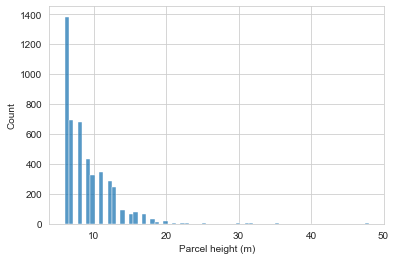

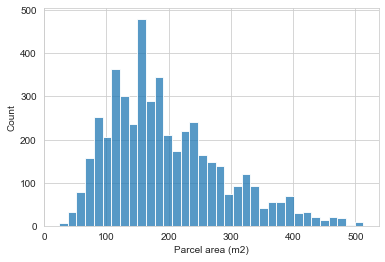

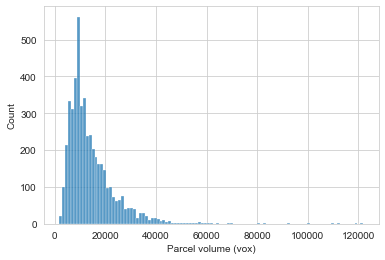

In [3]:
ax = sns.histplot(data=heights)
ax.set(xlabel="Parcel height (m)")
plt.show()
ax = sns.histplot(data=areas)
ax.set(xlabel="Parcel area (m2)")
plt.show()
ax = sns.histplot(data=volumes)
ax.set(xlabel="Parcel volume (vox)")
plt.show()


## Zooming in on heights

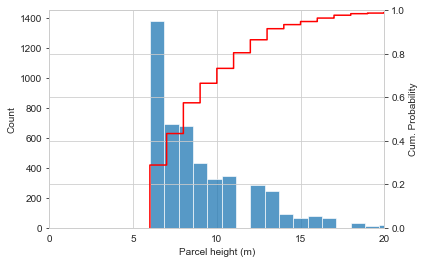

In [8]:
fig, ax = plt.subplots()
sns.histplot(data=heights, ax=ax, bins=max(heights) + 1)
ax.set(xlabel="Parcel height (m)")
ax.set(xlim=(0, 20))
ax.grid(False, axis="y")
ax2 = ax.twinx()
sns.ecdfplot(data=heights, ax=ax2, color="red")
ax2.set(xlim=(0, 20))
ax2.set(ylabel="Cum. Probability")
plt.locator_params(axis="x", integer=True, tight=True)
plt.show()


* By far most parcels have a height of 6.
* 80% of parcels have height < 14.
* With a height >= 15 a parcel is in the top decile.

## Zooming in on volumes

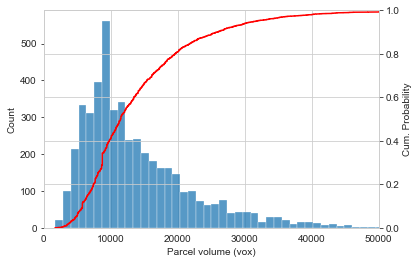

In [9]:
fig, ax = plt.subplots()
sns.histplot(data=volumes, ax=ax)
ax.set(xlabel="Parcel volume (vox)")
ax.set(xlim=(0, 50000))
ax.grid(False, axis="y")
ax2 = ax.twinx()
sns.ecdfplot(data=volumes, ax=ax2, color="red")
ax2.set(xlim=(0, 50000))
ax2.set(ylabel="Cum. Probability")
plt.show()


* 80% of parcels with a volume < 20k vox.
* Anything beyond ~25-30k is in the top decile of volumes.